In [1]:
#from SimulationHelper import *
#from tqdm import tqdm
import numpy as np
import os
import matplotlib.pyplot as plt 
from scipy.signal import savgol_filter
%matplotlib inline 

In [2]:
######################################################################
############################# Parameters #############################
######################################################################
N = 100
phi = 0.20
max_n_avg = 36
increment = 0.25
num_simulations = 50

n_avg = np.arange(1, max_n_avg, increment)
p = [avg/(N-1) for avg in n_avg]
n = len(p)

### Loading Data

In [27]:
file_dir = "./Results"
file_name = "RG_N_PC{}phi{}avg{}sim{}inc{}.npy".format(N,int(phi*100),max_n_avg,num_simulations, increment)
file_path = os.path.join(file_dir, file_name)
PC = np.load(file_path)

In [28]:
file_name = "RG_N{}phi{}avg{}sim{}inc{}.npy".format(N,int(phi*100),max_n_avg,num_simulations, increment)
ML = np.load(file_path)

### Processing Data

In [17]:
def plotter_percent(x1,x2, names):
    plt.plot(n_avg, x1)
    plt.plot(n_avg, x2)
    plt.ylabel("Average Number Influenced")
    plt.xlabel("Average Degree")
    plt.title("Percentage of Network Influenced")
    plt.legend(names)

In [18]:
def plotter_number(x1,x2, names):    
    plt.plot(n_avg, x1)
    plt.plot(n_avg, x2)
    plt.ylabel("Average Number Influenced")
    plt.xlabel("Average Degree")
    plt.title("Number of Nodes Influenced")
    plt.legend(names)

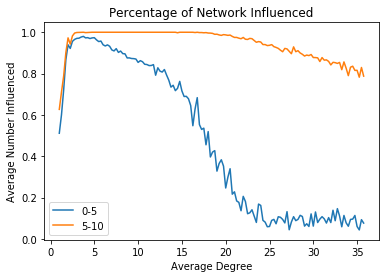

In [40]:
plotter_percent(N_05,N2_10)

## Plotting Function 

In [6]:
def plotter(phi, percentile1, percentile2, names, t = "percent"):
    N = 100
    phi = phi
    max_n_avg = 36
    increment = 0.25
    num_simulations = 50

    n_avg = np.arange(1, max_n_avg, increment)
    p = [avg/(N-1) for avg in n_avg]
    n = len(p)

    file_dir = "./Results"
    file_name = "RG_N_PC{}phi{}avg{}sim{}inc{}.npy".format(N,int(phi*100),max_n_avg,num_simulations, increment)
    file_path = os.path.join(file_dir, file_name)
    PC = np.load(file_path)
    file_name = "RG_N{}phi{}avg{}sim{}inc{}.npy".format(N,int(phi*100),max_n_avg,num_simulations, increment)
    ML = np.load(file_path)
    
    #tmp = np.array(results[0])
    tmp = ML
    dims = (num_simulations, n)
    #names = ["0-5", "5-10", "10-15", "15-20", "0-10", "0-15", "0-20", "Normal", "95-100"]

    s_05, s_10, s_15, s_20 =  np.reshape(tmp[:,0], dims),  np.reshape(tmp[:,1], dims),  np.reshape(tmp[:,2], dims),  np.reshape(tmp[:,3], dims)
    s_010, s_015, s_020, s_n, s_95 = np.reshape(tmp[:,4], dims), np.reshape(tmp[:,5], dims),  np.reshape(tmp[:,6], dims),  np.reshape(tmp[:,7], dims),  np.reshape(tmp[:,8], dims)

    t_05, t_10, t_15, t_20 = np.reshape(tmp[:,9], dims),  np.reshape(tmp[:,10], dims),  np.reshape(tmp[:,11], dims),  np.reshape(tmp[:,12], dims)
    t_010, t_015, t_020, t_n, t_95 = np.reshape(tmp[:,13], dims), np.reshape(tmp[:,14], dims),  np.reshape(tmp[:,15], dims),  np.reshape(tmp[:,16], dims), np.reshape(tmp[:,17], dims)
    
    # Number of Nodes of Network Influenced
    S_05, S_10, S_15, S_20 =  np.apply_along_axis(np.mean, 0, s_05), np.apply_along_axis(np.mean, 0, s_10), np.apply_along_axis(np.mean, 0, s_15), np.apply_along_axis(np.mean, 0, s_20)
    S_010, S_015, S_020, S_n, S_95 = np.apply_along_axis(np.mean, 0, s_010), np.apply_along_axis(np.mean, 0, s_015), np.apply_along_axis(np.mean, 0, s_020), np.apply_along_axis(np.mean, 0, s_n), np.apply_along_axis(np.mean, 0, s_95)

    # Proportion of Network Influenced
    N_05, N_10, N_15, N_20 =  [x/N for x in S_05], [x/N for x in S_10], [x/N for x in S_15], [x/N for x in S_20]
    N_010, N_015, N_020, N_n, N_95 = [x/N for x in S_010], [x/N for x in S_015], [x/N for x in S_020], [x/N for x in S_n], [x/N for x in S_95]

    # Averaged Time of Influenced Nodes
    T_05, T_10, T_15, T_20 =  np.apply_along_axis(np.mean, 0, t_05), np.apply_along_axis(np.mean, 0, t_10), np.apply_along_axis(np.mean, 0, t_15), np.apply_along_axis(np.mean, 0, t_20)
    T_010, T_015, T_020, T_n, T_95 = np.apply_along_axis(np.mean, 0, t_010), np.apply_along_axis(np.mean, 0, t_015), np.apply_along_axis(np.mean, 0, t_020), np.apply_along_axis(np.mean, 0, t_n), np.apply_along_axis(np.mean, 0, t_95)
    
    if t == "percent":
        x1 = "N_" + percentile1
        x1 = eval(x1)
        x2 = "N2_" + percentile2
        x2 = eval(x2)
        plotter_percent(x1, x2, names)
    if t == "number":
        x1 = "S_" + percentile1
        x1 = eval(x1)
        x2 = "S2_" + percentile2
        x2 = eval(x2)
        plotter_number(x1, x2, names)

In [4]:
def plotty_plot(phi, percentile, size, typ,names = []):
    N = 100
    phi = phi
    max_n_avg = 36
    increment = 0.25
    num_simulations = 50
    
    if size == 1:
        increment = 0.2
        num_simulations = 100

    n_avg = np.arange(1, max_n_avg, increment)
    p = [avg/(N-1) for avg in n_avg]
    n = len(p)
    
    file_dir = "./Results"
    if size == 1:
        file_name = "RG_N{}phi{}avg{}sim{}inc{}.npy".format(N,int(phi*100),max_n_avg,num_simulations, increment)
    else:
        file_name = "RG_N_PC{}phi{}avg{}sim{}inc{}size{}.npy".format(N,int(phi*100),max_n_avg,num_simulations, increment,size)
    file_path = os.path.join(file_dir, file_name)
    tmp = np.load(file_path)
    
    dims = (num_simulations, n)
    #names = ["0-5", "5-10", "10-15", "15-20", "0-10", "0-15", "0-20", "Normal", "95-100"]
    
    ## Replace Nan's with average of remaining values
    if np.sum(np.isnan(tmp[:,7])) > 0 and np.sum(np.isnan(tmp[:,7])) != 140:
        x = tmp[:,7]
        pos = np.logical_not(np.isnan(x))
        npos = np.isnan(x)
        avg = np.mean(x[pos])
        x[npos] = avg
        tmp[:,7] = x
        

    s_05, s_10, s_15, s_20 =  np.reshape(tmp[:,0], dims),  np.reshape(tmp[:,1], dims),  np.reshape(tmp[:,2], dims),  np.reshape(tmp[:,3], dims)
    s_010, s_015, s_020, s_n, s_95 = np.reshape(tmp[:,4], dims), np.reshape(tmp[:,5], dims),  np.reshape(tmp[:,6], dims),  np.reshape(tmp[:,7], dims),  np.reshape(tmp[:,8], dims)

    
    t_05, t_10, t_15, t_20 = np.reshape(tmp[:,9], dims),  np.reshape(tmp[:,10], dims),  np.reshape(tmp[:,11], dims),  np.reshape(tmp[:,12], dims)
    t_010, t_015, t_020, t_n, t_95 = np.reshape(tmp[:,13], dims), np.reshape(tmp[:,14], dims),  np.reshape(tmp[:,15], dims),  np.reshape(tmp[:,16], dims), np.reshape(tmp[:,17], dims)
    
    # Number of Nodes of Network Influenced
    S_05, S_10, S_15, S_20 =  np.apply_along_axis(np.mean, 0, s_05), np.apply_along_axis(np.mean, 0, s_10), np.apply_along_axis(np.mean, 0, s_15), np.apply_along_axis(np.mean, 0, s_20)
    S_010, S_015, S_020, S_n, S_95 = np.apply_along_axis(np.mean, 0, s_010), np.apply_along_axis(np.mean, 0, s_015), np.apply_along_axis(np.mean, 0, s_020), np.apply_along_axis(np.mean, 0, s_n), np.apply_along_axis(np.mean, 0, s_95)

    # Proportion of Network Influenced
    N_05, N_10, N_15, N_20 =  [x/N for x in S_05], [x/N for x in S_10], [x/N for x in S_15], [x/N for x in S_20]
    N_010, N_015, N_020, N_n, N_95 = [x/N for x in S_010], [x/N for x in S_015], [x/N for x in S_020], [x/N for x in S_n], [x/N for x in S_95]

    if typ == "percent":
        x = "N_" + percentile
        if phi == 0.5:
            smooth = savgol_filter(eval(x), 31, 3)
        else:
            smooth = savgol_filter(eval(x), 11, 3)
        plt.plot(n_avg, smooth)
        #plt.plot(n_avg, eval(x))
        plt.title("Proportion of Nodes Influenced")
        plt.ylabel("Percentage of Network Influenced")
    if typ == "number":
        x = "S_" + percentile
        if phi == 0.5:
            smooth = savgol_filter(eval(x), 31, 3)
        else:
            smooth = savgol_filter(eval(x), 11, 3)
        plt.plot(n_avg, smooth)
        #plt.plot(n_avg, eval(x))
        plt.title("Number of Nodes Influenced")
        plt.ylabel("Average Number Influenced")
    plt.xlabel("Average Degree")
    #plt.legend(names)

In [4]:
def plot_all_size(phi,percentile):    
    plotty_plot(phi, percentile,1,"number")
    plotty_plot(phi, percentile,2,"number")
    plotty_plot(phi, percentile,3,"number")
    plotty_plot(phi, percentile,4,"number")
    plotty_plot(phi, percentile,5,"number")
    plt.legend(["1", "2", "3", "4", "5"])
def plot_all_phi(percentile, size):    
    plotty_plot(0.05, percentile,size,"number")
    plotty_plot(0.10, percentile,size,"number")
    plotty_plot(0.20, percentile,size,"number")
    plotty_plot(0.25, percentile,size,"number")
    plotty_plot(0.50, percentile,size,"number")
    plt.legend(["0.05", "0.10", "0.20", "0.25", "0.50"])
def plot_all_percentile(phi,size):
    plotty_plot(phi, "05",size,"number")
    plotty_plot(phi, "10",size,"number")
    plotty_plot(phi, "15",size,"number")
    plotty_plot(phi, "20",size,"number")
    plotty_plot(phi, "n",size,"number")
    plotty_plot(phi, "95",size,"number")
    plt.legend(["0-5", "5-10", "10-15", "15-20", "Normal", "95-100"])

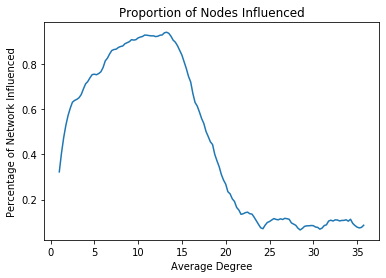

In [6]:
plotty_plot(0.18, "10",4, typ = "percent")

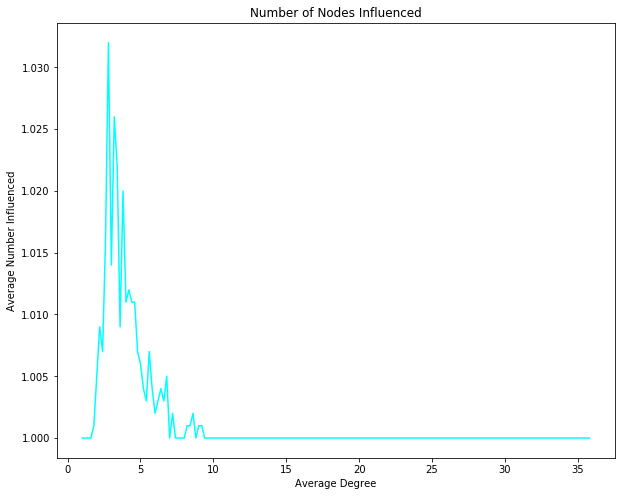

In [41]:
fig=plt.figure(figsize=(10, 8))
N = 5
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.cool(np.linspace(0,1,N)))
plotty_plot(0.50, "95",1,"number")

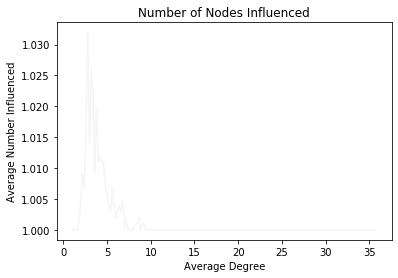

In [33]:
fig=plt.figure(figsize=(10, 8))
N = 5
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.PuRd(np.linspace(0,1,N)))
plot_all_size(0.50,"95")

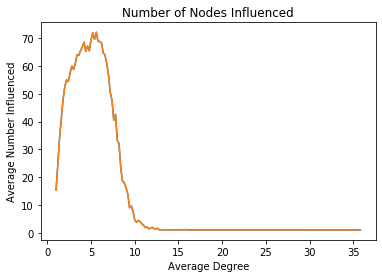

In [13]:
plt.plot(n_avg, S_05)
plotty_plot(0.18, "05",1,"number")

0


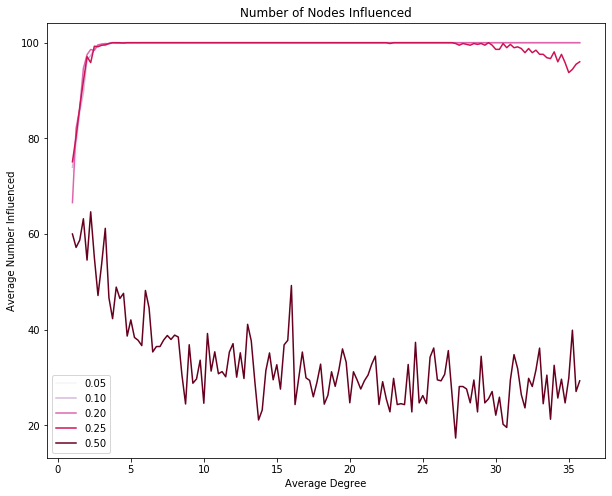

In [28]:
fig=plt.figure(figsize=(10, 8))
N = 5
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.PuRd(np.linspace(0,1,N)))
plot_all_phi("15", 4)

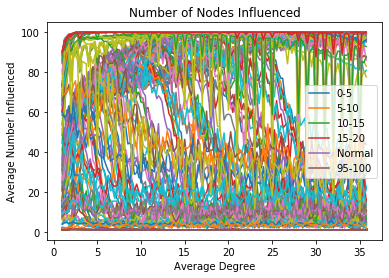

In [14]:
for i in [0.05, 0.10, 0.18, 0.2, 0.25, 0.5]:
    for j in np.arange(5):
        plot_all_percentile(i,j+1)

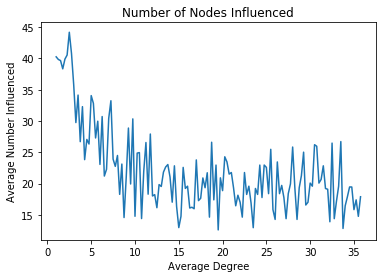

In [89]:

plotty_plot(0.50, "10",2,"number")

In [13]:
phi = 0.50

N = 100
phi = phi
max_n_avg = 36
increment = 0.25
num_simulations = 50

size = 2

n_avg = np.arange(1, max_n_avg, increment)
p = [avg/(N-1) for avg in n_avg]
n = len(p)

file_dir = "./Results"
file_name = "RG_N_PC{}phi{}avg{}sim{}inc{}size{}.npy".format(N,int(phi*100),max_n_avg,num_simulations, increment,size)
file_path = os.path.join(file_dir, file_name)
tmp = np.load(file_path)

print(np.sum(np.isnan(tmp)))

dims = (num_simulations, n)
#names = ["0-5", "5-10", "10-15", "15-20", "0-10", "0-15", "0-20", "Normal", "95-100"]

## Replace Nan's with average of remaining values
if np.sum(np.isnan(tmp[:,7])) > 0 and size not in [2,5]:
    x = tmp[:,7]
    pos = np.logical_not(np.isnan(x))
    npos = np.isnan(x)
    avg = np.mean(x[pos])
    x[npos] = avg
    tmp[:,7] = x
    print(np.sum(np.isnan(tmp[:,7])))


s_05, s_10, s_15, s_20 =  np.reshape(tmp[:,0], dims),  np.reshape(tmp[:,1], dims),  np.reshape(tmp[:,2], dims),  np.reshape(tmp[:,3], dims)
s_010, s_015, s_020, s_n, s_95 = np.reshape(tmp[:,4], dims), np.reshape(tmp[:,5], dims),  np.reshape(tmp[:,6], dims),  np.reshape(tmp[:,7], dims),  np.reshape(tmp[:,8], dims)


t_05, t_10, t_15, t_20 = np.reshape(tmp[:,9], dims),  np.reshape(tmp[:,10], dims),  np.reshape(tmp[:,11], dims),  np.reshape(tmp[:,12], dims)
t_010, t_015, t_020, t_n, t_95 = np.reshape(tmp[:,13], dims), np.reshape(tmp[:,14], dims),  np.reshape(tmp[:,15], dims),  np.reshape(tmp[:,16], dims), np.reshape(tmp[:,17], dims)

# Number of Nodes of Network Influenced
S_05, S_10, S_15, S_20 =  np.apply_along_axis(np.mean, 0, s_05), np.apply_along_axis(np.mean, 0, s_10), np.apply_along_axis(np.mean, 0, s_15), np.apply_along_axis(np.mean, 0, s_20)
S_010, S_015, S_020, S_n, S_95 = np.apply_along_axis(np.mean, 0, s_010), np.apply_along_axis(np.mean, 0, s_015), np.apply_along_axis(np.mean, 0, s_020), np.apply_along_axis(np.mean, 0, s_n), np.apply_along_axis(np.mean, 0, s_95)

# Proportion of Network Influenced
N_05, N_10, N_15, N_20 =  [x/N for x in S_05], [x/N for x in S_10], [x/N for x in S_15], [x/N for x in S_20]
N_010, N_015, N_020, N_n, N_95 = [x/N for x in S_010], [x/N for x in S_015], [x/N for x in S_020], [x/N for x in S_n], [x/N for x in S_95]

4


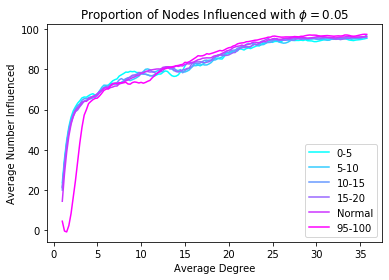

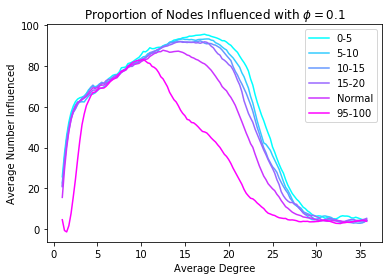

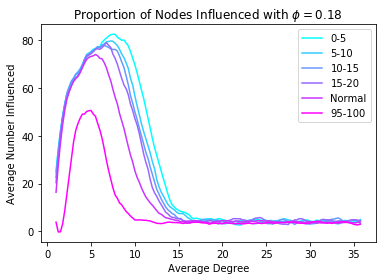

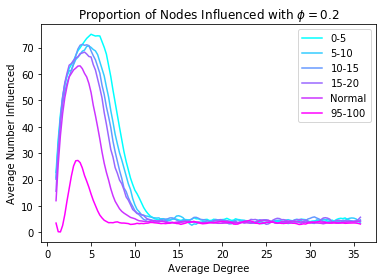

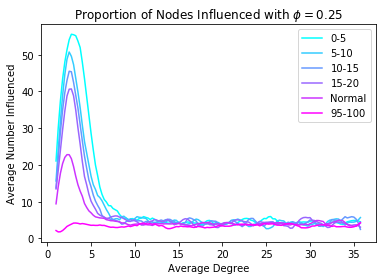

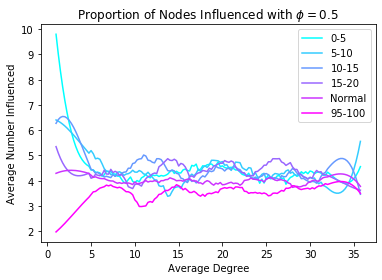

In [42]:
N = 6
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.cool(np.linspace(0,1,N)))
size = 2
phi = 0.18
file_dir = "./Results"
for phi in [0.05, 0.10, 0.18, 0.2, 0.25, 0.5]:
    fig=plt.figure(figsize=(6, 4))
    plotty_plot(phi, "05",size,"number")
    plotty_plot(phi, "10",size,"number")
    plotty_plot(phi, "15",size,"number")
    plotty_plot(phi, "20",size,"number")
    plotty_plot(phi, "n",size,"number")
    plotty_plot(phi, "95",size,"number")
    plt.legend(["0-5", "5-10", "10-15", "15-20", "Normal", "95-100"])
    figname = "/PC_figs/Phi_" + str(int(phi*100)) + "_Size_" + str(size) 
    plt.title(r'Proportion of Nodes Influenced with $\phi = $' + str(phi)) 
    plt.savefig(file_dir + figname)

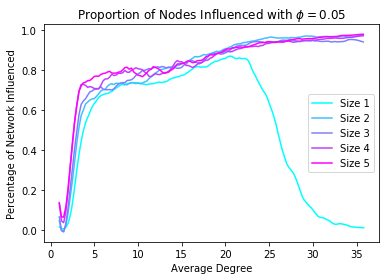

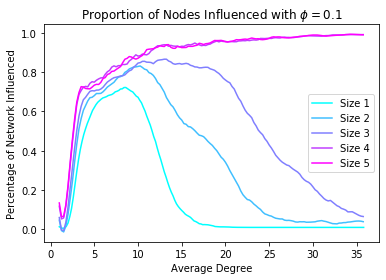

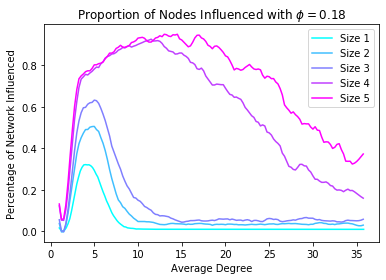

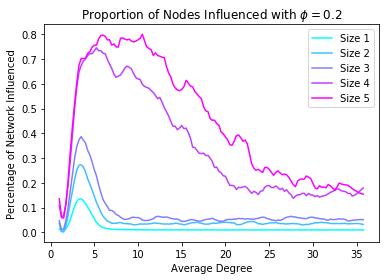

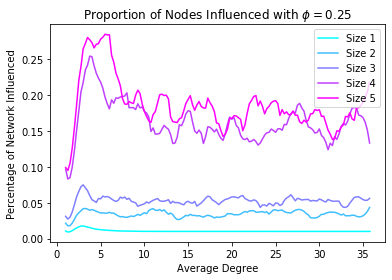

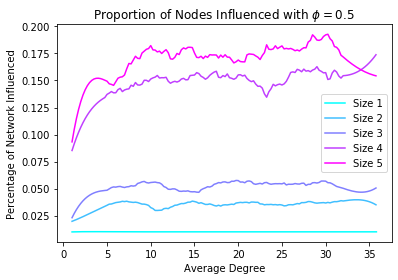

In [11]:
N = 5
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.cool(np.linspace(0,1,N)))
size = 5
phi = 0.18
percentile = "95"
file_dir = "./Results"
for phi in [0.05, 0.10, 0.18, 0.2, 0.25, 0.5]:
    fig=plt.figure(figsize=(6, 4))
    plotty_plot(phi, percentile,1,"percent")
    plotty_plot(phi, percentile,2,"percent")
    plotty_plot(phi, percentile,3,"percent")
    plotty_plot(phi, percentile,4,"percent")
    plotty_plot(phi, percentile,5,"percent")
    plt.legend(["Size 1","Size 2", "Size 3", "Size 4", "Size 5"])
    figname = "/PC_figs/Phi_" + str(int(phi*100)) + "_Percentile_" + str(percentile) 
    plt.title(r'Proportion of Nodes Influenced with $\phi = $' + str(phi))
    plt.savefig(file_dir + figname)

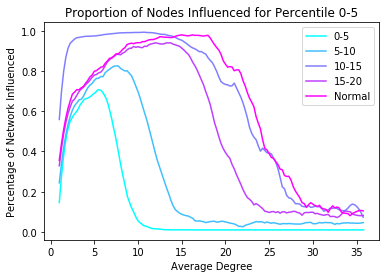

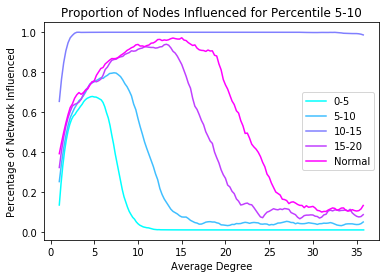

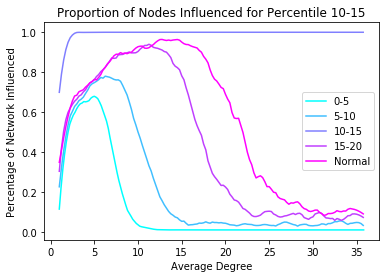

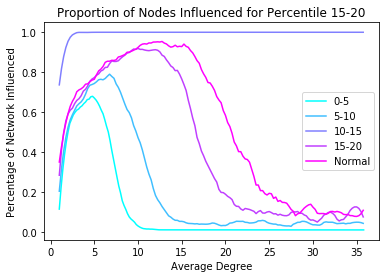

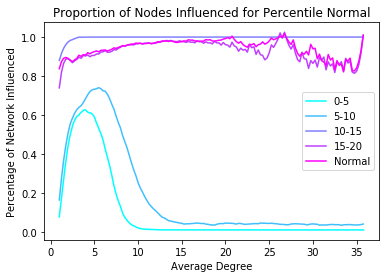

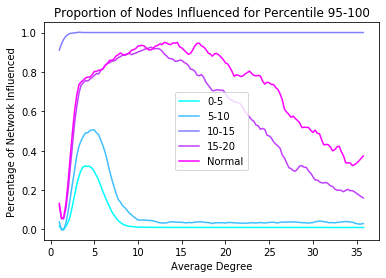

In [20]:
N = 5
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.cool(np.linspace(0,1,N)))
size = 5
phi = 0.18
percentile = "95"
file_dir = "./Results"
nam = ["0-5", "5-10", "10-15", "15-20", "Normal", "95-100"]
per = ["05","10","15","20","n","95"]
for i in np.arange(6):
    percentile = per[i]
    fig=plt.figure(figsize=(6, 4))
    plotty_plot(phi, percentile,1,"percent")
    plotty_plot(phi, percentile,2,"percent")
    plotty_plot(phi, percentile,3,"percent")
    plotty_plot(phi, percentile,4,"percent")
    plotty_plot(phi, percentile,5,"percent")
    plt.legend(["0-5", "5-10", "10-15", "15-20", "Normal", "95-100"])
    figname = "/PC_figs/Phi_" + str(int(phi*100)) + "_Percentile_" + str(percentile) 
    plt.title(r'Proportion of Nodes Influenced for Percentile ' + nam[i]) 
    #plt.savefig(file_dir + figname)

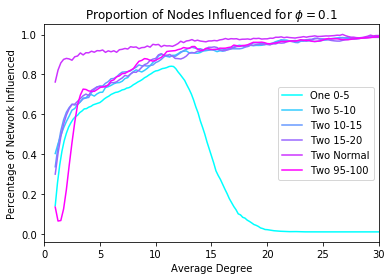

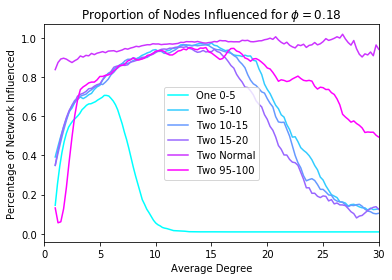

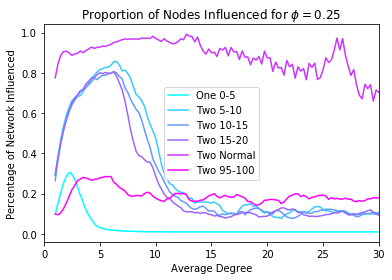

In [40]:
N = 6
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.cool(np.linspace(0,1,N)))

for phi in [0.10, 0.18, 0.25]:
    fig=plt.figure(figsize=(6, 4))
    plotty_plot(phi, "05",1,"percent")
    plotty_plot(phi, "10",5,"percent")
    plotty_plot(phi, "15",5,"percent")
    plotty_plot(phi, "20",5,"percent")
    plotty_plot(phi,  "n",5,"percent")
    plotty_plot(phi, "95",5,"percent")
    plt.legend(["One 0-5", "Two 5-10", "Two 10-15", "Two 15-20", "Two Normal", "Two 95-100"])
    plt.title(r'Proportion of Nodes Influenced for $\phi = $' + str(phi)) 
    plt.xlim(0,30)
    figname = "/PC_figs/Comp_Phi_" + str(int(phi*100))
    #plt.savefig(file_dir + figname)